<ipython-input-3-c614f520679f>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['month'] = pd.date_range(start='1949-01', periods=len(df), freq='M')


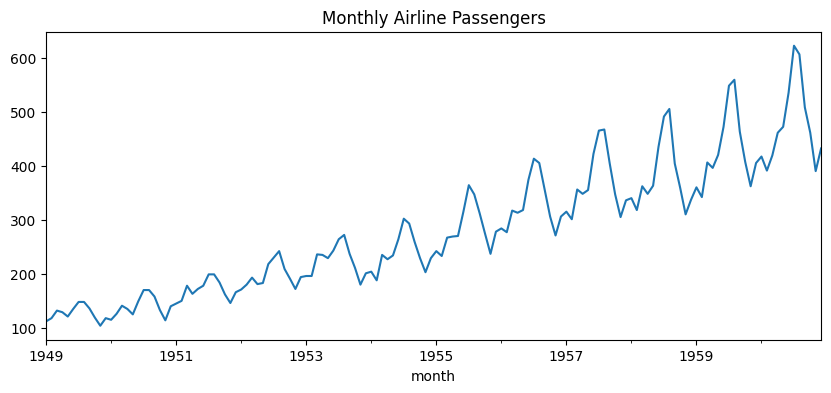

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


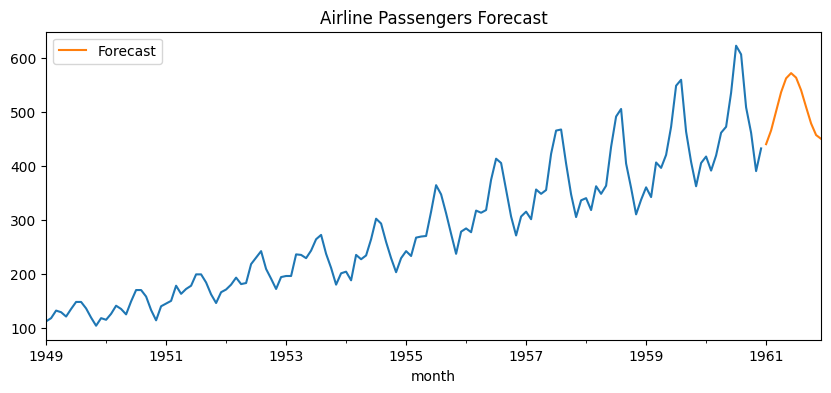

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.datasets import get_rdataset

# Load the dataset
data = get_rdataset("AirPassengers").data
df = data.rename(columns={'value': 'passengers'})
df['month'] = pd.date_range(start='1949-01', periods=len(df), freq='M')
df.set_index('month', inplace=True)

# Plot original data
df['passengers'].plot(title="Monthly Airline Passengers", figsize=(10, 4))
plt.show()

# Fit ARIMA model
model = ARIMA(df['passengers'], order=(2, 1, 2))
model_fit = model.fit()

# Forecast next 12 months
forecast = model_fit.forecast(steps=12)

# Plot forecast
df['passengers'].plot(label='Actual', figsize=(10, 4))
forecast.plot(label='Forecast', legend=True)
plt.title("Airline Passengers Forecast")
plt.show()
